In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate ,Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dense
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
input_1 = Input(shape = (28, 28, 1, ))
x = Conv2D(16, (3, 3), padding='same', activation='relu')(input_1)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
y = Conv2D(8, (5, 5), padding='same', activation='relu')(input_1)
y = BatchNormalization()(y)
y = MaxPooling2D()(y)
z = concatenate([x, y])
x = Conv2D(8, (3, 3), padding='same', activation='relu')(z)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
y = Conv2D(4, (5, 5), padding='same', activation='relu')(z)
y = BatchNormalization()(y)
y = MaxPooling2D()(y)
z = concatenate([x, y])
z = GlobalMaxPooling2D()(z)
output = Dense(10, activation='softmax')(z)
new_model = Model(input_1, output)

In [4]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 8)    208         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d[0][0]                     
______________________________________________________________________________________________

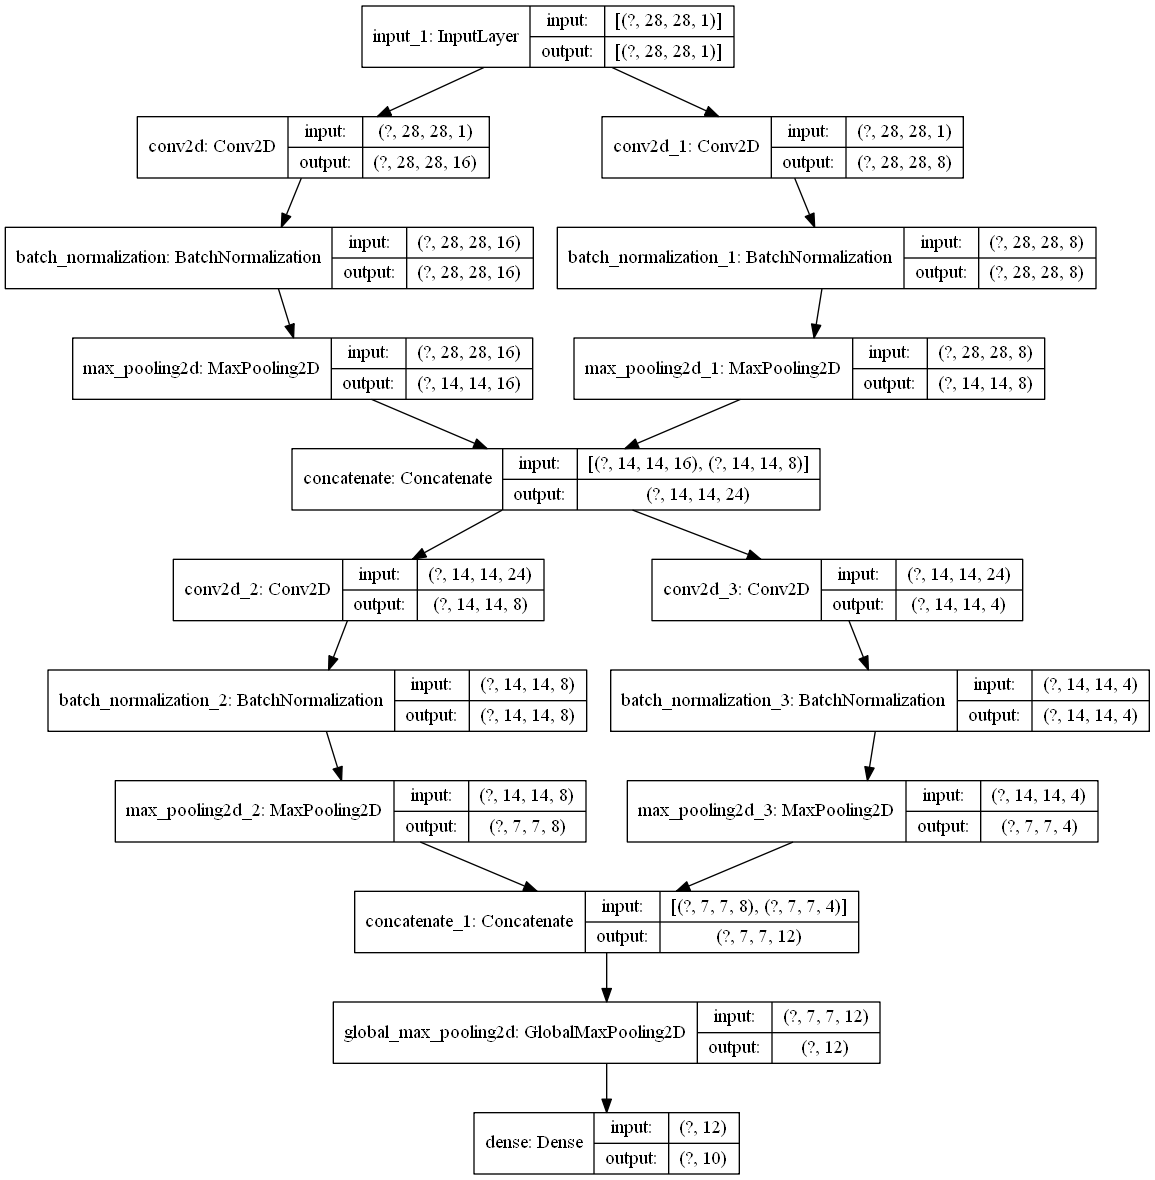

In [5]:
plot_model(new_model, show_shapes=True)

In [6]:
new_model.compile(optimizer = 'Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = new_model.fit(x_train, y_train, epochs=25, batch_size=100, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 18s 299us/sample - loss: 0.9198 - accuracy: 0.7473 - val_loss: 0.6347 - val_accuracy: 0.7820
Epoch 2/25
60000/60000 [==============================] - 14s 231us/sample - loss: 0.2477 - accuracy: 0.9260 - val_loss: 0.1964 - val_accuracy: 0.9382
Epoch 3/25
60000/60000 [==============================] - 14s 229us/sample - loss: 0.1796 - accuracy: 0.9454 - val_loss: 0.1530 - val_accuracy: 0.9542
Epoch 4/25
60000/60000 [==============================] - 14s 231us/sample - loss: 0.1475 - accuracy: 0.9544 - val_loss: 0.1385 - val_accuracy: 0.9575
Epoch 5/25
60000/60000 [==============================] - 14s 237us/sample - loss: 0.1302 - accuracy: 0.9595 - val_loss: 0.1395 - val_accuracy: 0.9572
Epoch 6/25
60000/60000 [==============================] - 15s 250us/sample - loss: 0.1170 - accuracy: 0.9632 - val_loss: 0.1405 - val_accuracy: 0.9560
Epoch 7/25
60000/60000 [====================

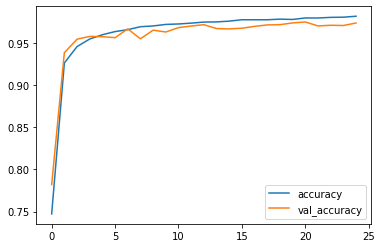

In [11]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

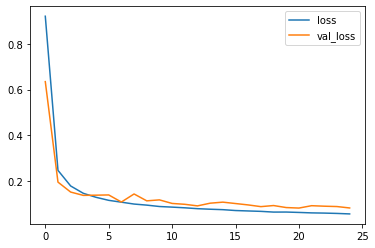

In [12]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()